In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import json

In [2]:
path_to_weather_json = "files\\weather.json"

In [3]:
with open(path_to_weather_json, 'r') as file:
    weather = json.load(file)

In [4]:
weather_hourly = weather['hourly']['data']

In [5]:
weather_hourly_df = pd.DataFrame(weather_hourly)
weather_hourly_df.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
0,50.78,0.06,40.73,0.68,clear-night,339.7,0.0000,0.00,NaN,1018.6,Clear,50.78,1582095600,0,10,307,5.51,4.55
1,48.46,0.10,40.77,0.71,clear-night,339.0,0.0000,0.00,NaN,1018.7,Clear,49.93,1582099200,0,10,200,5.15,4.48
2,48.16,0.12,41.47,0.73,clear-night,338.0,0.0010,0.02,rain,1018.9,Clear,49.61,1582102800,0,10,238,5.69,4.36
3,47.61,0.14,42.03,0.76,clear-night,336.1,0.0003,0.01,rain,1019.0,Clear,49.13,1582106400,0,10,248,5.82,4.36
4,47.24,0.15,42.24,0.79,clear-night,333.7,0.0022,0.03,rain,1019.1,Clear,48.59,1582110000,0,10,250,5.45,4.00


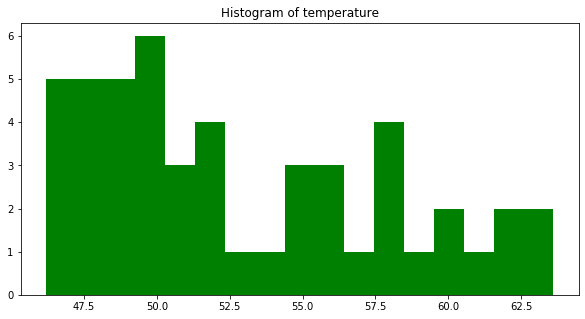

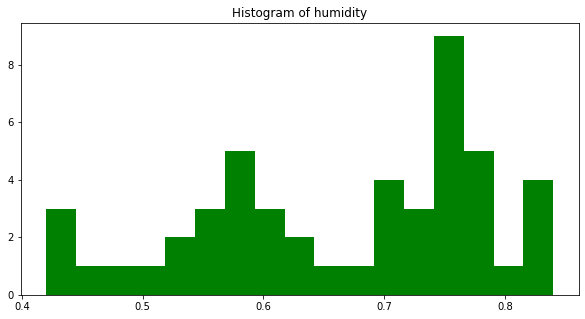

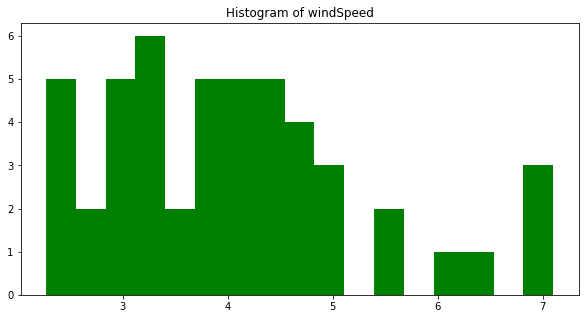

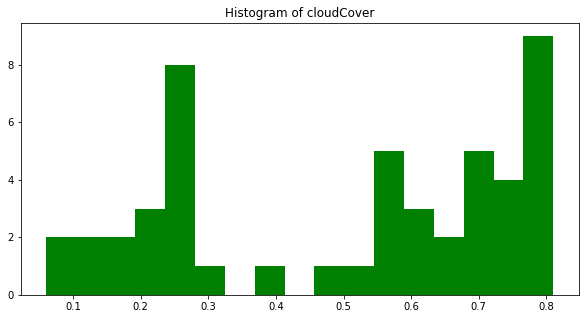

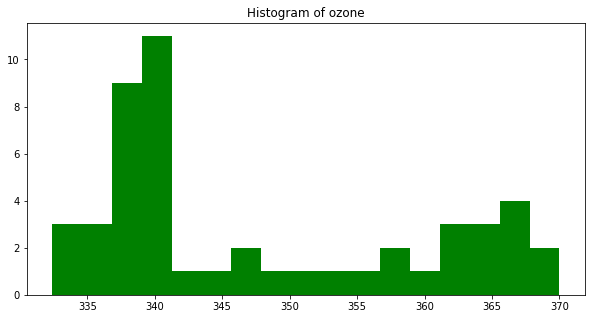

In [6]:
def create_and_save_hist(df, column_name):
    plt.figure(figsize=(10,5))
    plt.title('Histogram of %s' % column_name) 
    plt.hist(df['%s' % column_name], bins=17, color='g')
    plt.savefig('hists\%s_hist' % column_name)
    
needed_columns = ['temperature', 'humidity', 'windSpeed', 'cloudCover', 'ozone']
for column in needed_columns:
    create_and_save_hist(weather_hourly_df, column)

Для задания 2 вытащу столбец temperature

In [7]:
temperature_column = weather_hourly_df.loc[:, 'temperature']

In [8]:
with open('files\\temperature.txt', 'w') as file:
    for temp in temperature_column:
        file.write(str(temp) + '\n')

In [9]:
path_to_passwords_json = "files\\passwords.json"

In [10]:
with open(path_to_passwords_json, 'r') as file:
    passwords = json.load(file)

In [11]:
with open("files\\passwords.txt", "w") as file:
    for password in passwords:
        file.write(password + '\n')

In [12]:
with open("files\\pbkdf2_bits.txt", "r") as file:
    pbkdf2 = list(file.readlines())

In [13]:
with open("files\\hkdf_bits.txt", "r") as file:
    hkdf = list(file.readlines())

In [14]:
hkdf = [int(x) for x in hkdf]
pbkdf2 = [int(x) for x in pbkdf2]

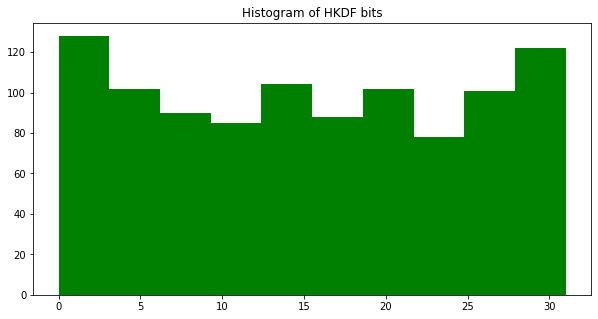

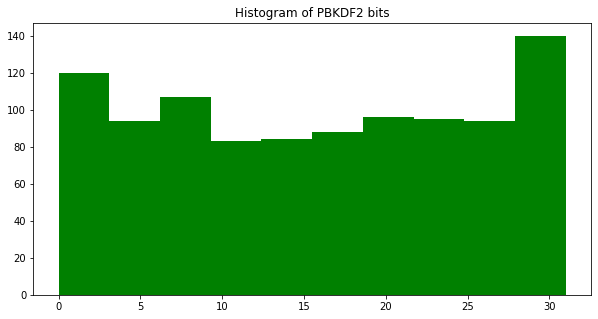

In [18]:
plt.figure(figsize=(10,5))
plt.title('Histogram of HKDF bits') 
plt.hist(hkdf, bins=10, color='g')
plt.savefig('hists\HKDF_gist')

plt.figure(figsize=(10,5))
plt.title('Histogram of PBKDF2 bits') 
plt.hist(pbkdf2, bins=10, color='g')
plt.savefig('hists\PBKDF2_gist')